# Final Project

Julia Kirk

## Imports

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
billsDF = pd.read_csv("datasets/healthBills.csv")
billsDF.head()

,billName,longTitle,Bill #,session,subjects,primeSponsors,committees,summary,approved,effective,vetoed
0,Certified Community Behavioral Health Clinics,Concerning applying for federal grants related...,HB24-1384,2024 Regular Session,"['Subject:', 'Health Care & Health Insurance']","['Shannon Bird', 'Emily Sirota', 'Rachel Zenzi...","{'House': ['Health & Human Services'], 'Senate...","No later than February 1, 2025, the act requir...","June 7, 2024","June 7, 2024",False
1,Eliminate Premium Tax to Health Insurance Affo...,Concerning the elimination of the allocation o...,HB24-1470,2024 Regular Session,"['Fiscal Policy & Taxes', 'Health Care & Healt...","['Shannon Bird', 'Rick Taggart', 'Rachel Zenzi...","{'House': ['Appropriations'], 'Senate': ['Appr...","Starting in the 2023-24 state fiscal year, the...","June 7, 2024","June 7, 2024",False
2,Oral Health Screening in Schools Pilot Program,Concerning oral health screening in public sch...,SB24-142,2024 Regular Session,"['Education & School Finance (Pre & K-12)', 'H...","['Janice Marchman', 'Barbara Kirkmeyer', 'Shan...","{'House': ['Health & Human Services', 'Appropr...",The act amends the Colorado oral health commun...,"June 7, 2024","June 7, 2024",False
3,Out-of-State Telehealth Providers,Concerning out-of-state health-care workers pr...,SB24-141,2024 Regular Session,"['Health Care & Health Insurance', 'Profession...","['Kevin Van Winkle', 'Dafna Michaelson Jenet',...","{'House': ['Finance', 'Appropriations'], 'Sena...",The act allows a health-care provider (applica...,"June 7, 2024","June 7, 2024",False
4,Bilingual Child Care Licensing Resources,Concerning requiring the department of early c...,HB24-1009,2024 Regular Session,"['Children & Domestic Matters', 'Health Care &...","['Junie Joseph', 'Barbara McLachlan', 'Joann G...","{'House': ['Education', 'Appropriations'], 'Se...",The act requires the department of early child...,"June 6, 2024","June 6, 2024",False


In [3]:
lobbyingDF = pd.read_csv("datasets/lobbying.csv")
lobbyingDF.head()

,Lobbyist,Client,Position,Start date,End date,Bill #,Subject
0,"Ward, Taylor Blake",Colorado Department of Public Health and Envir...,NaN,01/01/2024,08/12/2024,HB24-1106,Require Information about Abortion Pill Reversal
1,"Robinson, Anaya D",ACLU of Colorado,Opposing,03/04/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal
2,"Morse Public Affairs, LLC",Adams County Health Department,Opposing,02/12/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal
3,"Ruddock, Michael J",Adams County Health Department,Opposing,02/12/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal
4,"MANDARICH, MARY ALICE",COBALT,Opposing,02/14/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal


In [4]:
repsDF = pd.read_csv('datasets/regular2024.csv')
repsDF.head()

,Name,Occupation,Leadership Position,Party,Committee Assignments,Mailing Address,Capitol Phone,Email,District Number
0,Steve Fenberg,NaN,President of the Senate,Democrat,Executive Committee of the Legislative Council...,"200 E Colfax None, Denver, CO 80203, United St...",303-866-4872,stephen.fenberg.senate@coleg.gov,18
1,Karen McCormick,Veterinarian,NaN,Democrat,"Agriculture, Water & Natural Resources, Health...","200 E Colfax RM 307, Denver, CO 80203, United ...",303-866-2780,karen.mccormick.house@coleg.gov,11
2,Mike Lynch,NaN,NaN,Republican,"Agriculture, Water & Natural Resources, Busine...","200 E Colfax RM 307, Denver, CO 80203, United ...",303-866-2907,mike.lynch.house@coleg.gov,65
3,Jennifer Bacon,NaN,Assistant Majority Leader,Democrat,"Judiciary, Education","200 E Colfax RM 307, Denver, CO 80203, United ...",303-866-2909,jennifer.bacon.house@coleg.gov,7
4,Tony Exum,NaN,NaN,Democrat,"Local Government & Housing, Transportation & E...","200 E Colfax RM 346, Denver, CO 80203, United ...",303-866-6364,tony.exum.senate@coleg.gov,11


In [5]:
billCount = lobbyingDF['Bill #'].value_counts().reset_index()
billCount.columns = ['Bill #', 'Count']
billsDF = billsDF.merge(billCount, on='Bill #', how='left')
billsDF['Count'] = billsDF['Count'].fillna(0).astype(int)

In [12]:
lobbyist_df = lobbyingDF.groupby('Lobbyist').agg({ 
    'Bill #': [
        lambda x: list(dict.fromkeys(x)), # get unique bill values
        'count', # get count of lobbyist occurances
        lambda x: len(set(x)) # unique count of lobbyists
    ]
}).reset_index()

# rename coulumns
lobbyist_df.columns = ['Lobbyist', 'Bills', 'Count', 'Unique Count']

# Sort by total count
lobbyist_df = lobbyist_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

lobbyist_df.head()


,Lobbyist,Bills,Count,Unique Count
0,"Mendez, Barkis and Associates","[HB24-1106, HB24-1066, HB24-1258, HB24-1113, H...",162,50
1,"Aponte Public Affairs, Inc.","[HB24-1106, HB24-1066, SB24-010, HB24-1058, HB...",132,46
2,"Herzberg, Brock","[HB24-1106, HB24-1066, HB24-1113, SB24-167, HB...",122,55
3,"Gates, Landon","[HB24-1106, HB24-1066, HB24-1113, SB24-167, HB...",122,55
4,"Capitol Focus, LLC","[HB24-1106, HB24-1066, HB24-1113, SB24-167, HB...",122,55


In [18]:
client_df = lobbyingDF.groupby('Client').agg({ # groups by client
    'Bill #': [
        lambda x: list(dict.fromkeys(x)), # creates list of bills for the client
        'count', # count the total number of bills for the client
        lambda x: len(set(x)) # calculate the number of unique bills for a client
    ]
}).reset_index()
# create dataframe and sort by total count
client_df.columns = ['Client', 'Bills', 'Total Count', 'Unique Count']
client_df = client_df.sort_values(by='Total Count', ascending=False).reset_index(drop=True)
client_df.head()


,Client,Bills,Total Count,Unique Count
0,Colorado Hospital Association,"[HB24-1066, HB24-1258, HB24-1113, HB24-1058, H...",292,45
1,AdventHealth,"[HB24-1066, SB24-010, HB24-1058, HB24-1075, HB...",180,24
2,HCA-THE HEALTHCARE COMPANY,"[HB24-1106, HB24-1066, HB24-1058, HB24-1262, H...",141,42
3,Colorado Psychiatric Society,"[HB24-1066, HB24-1075, HB24-1471, HB24-1005, H...",104,28
4,Colorado Community Health Network,"[HB24-1066, HB24-1113, SB24-010, HB24-1075, HB...",96,20


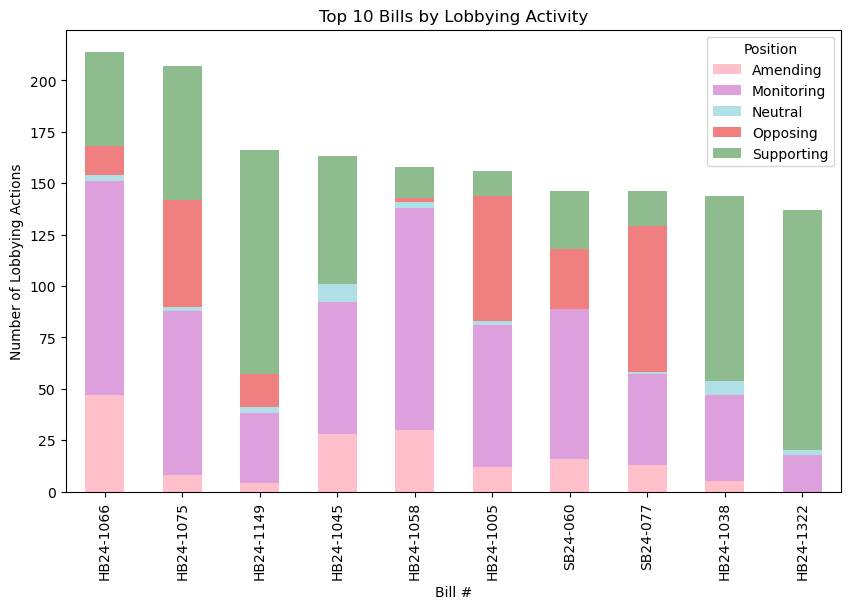

In [35]:
# Fill missing values with 'Neutral'
lobbyingDF['Position'] = lobbyingDF['Position'].fillna('Neutral')

# Group by bill and position and count occurrences
lobbying_counts = lobbyingDF.groupby(['Bill #', 'Position']).size().reset_index(name='Count')

# Create a pivot table to summarize the data
lobbying_pivot = lobbying_counts.pivot(index='Bill #', columns='Position', values='Count').fillna(0)

# Calculate the total activity for each bill
lobbying_pivot['Total'] = lobbying_pivot.sum(axis=1)

# Sort bills by Total Activity
top_bills = lobbying_pivot.sort_values(by='Total', ascending=False).head(10)

# Define positions dynamically and color mapping
positions = [col for col in lobbying_pivot.columns if col != 'Total']
color_map = {
    'Neutral': 'powderblue',    # Gold
    'Supporting': 'darkseagreen', # LimeGreen
    'Opposing': 'lightcoral',   # OrangeRed
    'Amending': 'pink',   # DodgerBlue
    'Monitoring': 'plum'  # BlueViolet
}

# Plot the top 10 bills with custom colors
top_bills[positions].plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=[color_map.get(pos, '#333333') for pos in positions]
)

plt.title("Top 10 Bills by Lobbying Activity")
plt.xlabel("Bill #")
plt.ylabel("Number of Lobbying Actions")
plt.legend(title="Position")
plt.show()


In [21]:
lobbying_pivot

Position,Amending,Monitoring,Neutral,Opposing,Supporting,Total Activity
Bill #,,,,,,
HB24-1005,12.0,69.0,2.0,61.0,12.0,156.0
HB24-1009,1.0,6.0,2.0,0.0,51.0,60.0
HB24-1010,26.0,70.0,2.0,11.0,25.0,134.0
HB24-1015,3.0,76.0,2.0,1.0,29.0,111.0
HB24-1028,0.0,45.0,2.0,36.0,53.0,136.0
...,...,...,...,...,...,...
SB24-167,1.0,8.0,3.0,0.0,3.0,15.0
SB24-168,4.0,17.0,1.0,0.0,41.0,63.0
SB24-175,6.0,18.0,3.0,0.0,40.0,67.0


/var/folders/zb/xsj3rq1d63n6b8dq4rz88gfc0000gn/T/ipykernel_62908/4062435030.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pastel = get_cmap('Pastel1', len(positions))


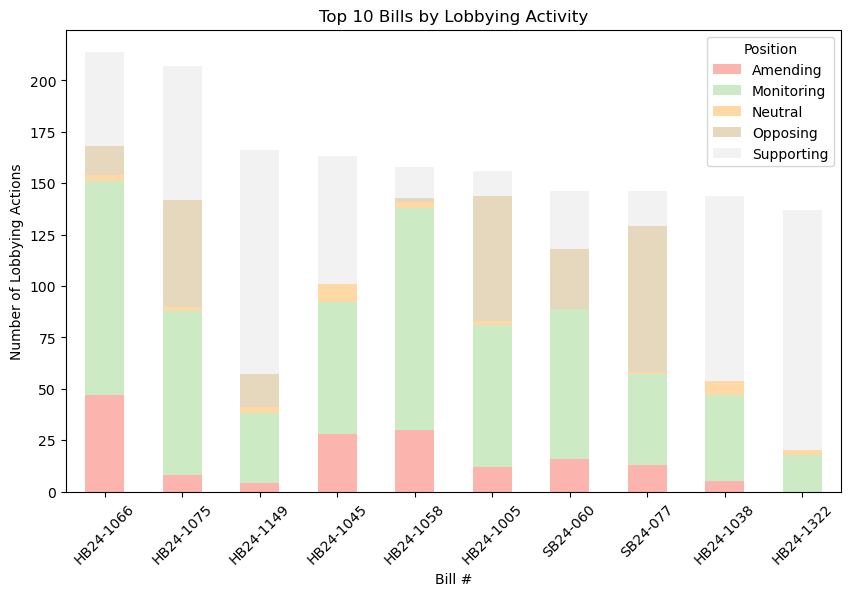

In [33]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Fill missing values with 'Neutral'
lobbyingDF['Position'] = lobbyingDF['Position'].fillna('Neutral')

# Group by bill and position and count occurrences
lobbying_counts = lobbyingDF.groupby(['Bill #', 'Position']).size().reset_index(name='Count')

# Create a pivot table to summarize the data
lobbying_pivot = lobbying_counts.pivot(index='Bill #', columns='Position', values='Count').fillna(0)

# Calculate the total activity for each bill
lobbying_pivot['Total'] = lobbying_pivot.sum(axis=1)

# Sort bills by Total Activity
top_bills = lobbying_pivot.sort_values(by='Total', ascending=False).head(10)

# Define positions dynamically
positions = [col for col in lobbying_pivot.columns if col != 'Total']

# Get the Pastel1 colormap
pastel = get_cmap('Pastel1', len(positions))

# Assign colors to each position using the Pastel1 palette
colors = [pastel(i) for i in range(len(positions))]

# Plot the top 10 bills with custom colors
top_bills[positions].plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=colors
)

plt.title("Top 10 Bills by Lobbying Activity")
plt.xlabel("Bill #")
plt.ylabel("Number of Lobbying Actions")
plt.legend(title="Position", labels=positions)
plt.xticks(rotation=45)
plt.show()


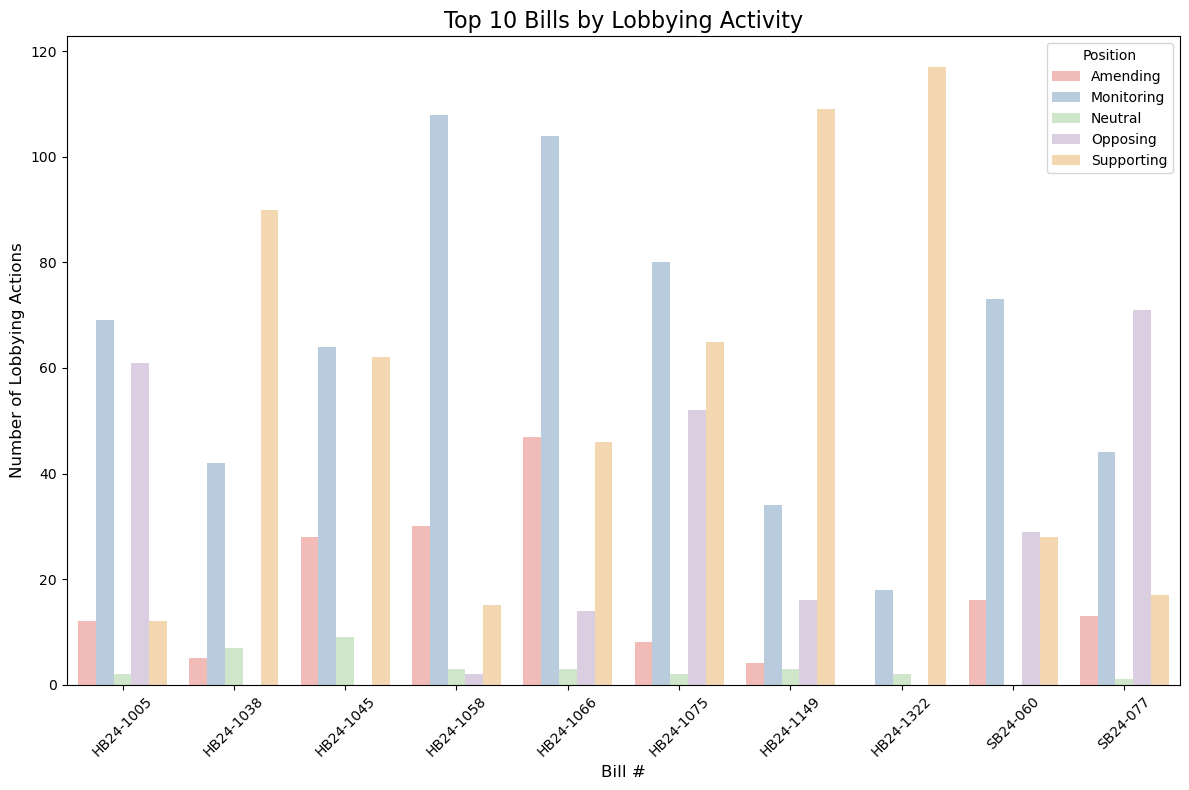

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fill missing values with 'Neutral'
lobbyingDF['Position'] = lobbyingDF['Position'].fillna('Neutral')

# Group by bill and position and count occurrences
lobbying_counts = lobbyingDF.groupby(['Bill #', 'Position']).size().reset_index(name='Count')

# Sort bills by total activity (sum of all positions)
total_counts = lobbying_counts.groupby('Bill #')['Count'].sum().reset_index()
top_bills = total_counts.nlargest(10, 'Count')['Bill #']

# Filter the lobbying_counts DataFrame for the top 10 bills
lobbying_top_bills = lobbying_counts[lobbying_counts['Bill #'].isin(top_bills)]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=lobbying_top_bills,
    x='Bill #',
    y='Count',
    hue='Position',
    palette='Pastel1'
)

# Customize the plot
plt.title("Top 10 Bills by Lobbying Activity", fontsize=16)
plt.xlabel("Bill #", fontsize=12)
plt.ylabel("Number of Lobbying Actions", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Position", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


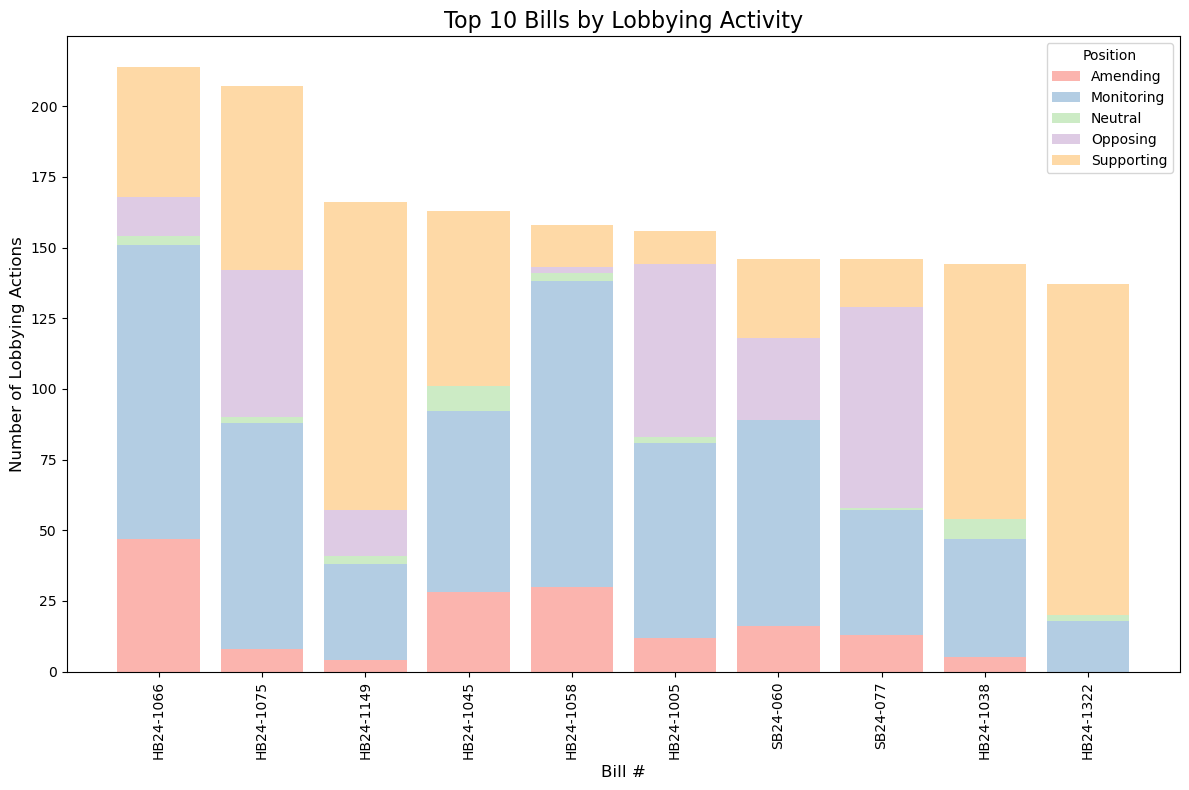

In [ ]:

# Fill missing values with 'Neutral'
lobbyingDF['Position'] = lobbyingDF['Position'].fillna('Neutral')

# Group by bill and position and count occurrences
lobbying_counts = lobbyingDF.groupby(['Bill #', 'Position']).size().reset_index(name='Count')

# Create a pivot table for stacking data
lobbying_pivot = lobbying_counts.pivot(index='Bill #', columns='Position', values='Count').fillna(0)

# Calculate total activity and sort the top 10 bills
lobbying_pivot['Total'] = lobbying_pivot.sum(axis=1)
top_bills = lobbying_pivot.sort_values(by='Total', ascending=False).head(10)

# Drop 'Total' column as it is not needed for plotting
top_bills = top_bills.drop(columns='Total')

# Use Seaborn's Pastel1 palette
palette = sns.color_palette('Pastel1', n_colors=len(top_bills.columns))

# Create a stacked bar plot
plt.figure(figsize=(12, 8))

# Cumulative plot for stacking bars
bottom_value = [0] * len(top_bills)  # Start with a baseline of zeros
for idx, position in enumerate(top_bills.columns):
    plt.bar(
        top_bills.index, 
        top_bills[position], 
        bottom=bottom_value, 
        label=position, 
        color=palette[idx]
    )
    # Update bottom values for stacking
    bottom_value += top_bills[position]

# Customize the plot
plt.title("Top 10 Bills by Lobbying Activity", fontsize=16)
plt.xlabel("Bill #", fontsize=12)
plt.ylabel("Number of Lobbying Actions", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Position")
plt.tight_layout()

# Show the plot
plt.show()
